In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/hotel_bookings.csv")

In [ ]:
data.shape


(119390, 32)

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**hotel	Identificador del hotel**: (puede no ser único)	object	No nulos

**is_canceled**:	Indica si la reserva fue cancelada (1) o no (0)	int64	No nulos
lead_time	Tiempo de antelación con el que se realizó la reserva (en días)	int64	No nulos

**arrival_date_year**:	Año de la fecha de llegada	int64	No nulos

**arrival_date_month**:	Mes de la fecha de llegada (formato texto)	object	No nulos

**arrival_date_week_number**:	Número de semana del año correspondiente a la fecha de llegada	int64	No nulos

**arrival_date_day_of_month**:	Día del mes de la fecha de llegada	int64	No nulos

**stays_in_weekend_nights**:	Número de noches de la estancia que caen en fin de semana	int64	No nulos

**stays_in_week_nights**:	Número de noches de la estancia que caen entre semana	int64	No nulos

**adults**:	Número de adultos en la reserva	int64	No nulos

**children**:	Número de niños en la reserva (permite valores decimales)	float64	Algunos nulos

**babies**:	Número de bebés en la reserva	int64	No nulos

**meal**:	Tipo de comida incluida en la reserva (ej. desayuno, media pensión)	object	No nulos

**country**:	País de origen del huésped	object	Algunos nulos

**market_segment**:	Segmento de mercado al que pertenece la reserva	object	No nulos

**distribution_channel**:	Canal de distribución a través del cual se realizó la reserva	object	No nulos

**is_repeated_guest**:	Indica si el huésped es recurrente (1) o no (0)	int64	No nulos

**previous_cancellations**:	Número de cancelaciones previas del mismo huésped	int64	No nulos

**previous_bookings_not_canceled**:	Número de reservas previas del mismo huésped que no fueron canceladas	int64	No nulos

**reserved_room_type**:	Tipo de habitación reservada	object	No nulos

**assigned_room_type**:	Tipo de habitación asignada al huésped	object	No nulos

**booking_changes**:	Número de cambios realizados a la reserva	int64	No nulos

**deposit_type**:	Tipo de depósito realizado para la reserva	object	No nulos

**agent**:	Identificador del agente que realizó la reserva (puede tener valores nulos)	float64	Muchos nulos

**company**:	Identificador de la compañía a la que pertenece el agente (puede tener valores nulos)	float64	Muchos nulos

**days_in_waiting_list**:	Días que el huésped estuvo en lista de espera (si aplica)	int64	No nulos

**customer_type**:	Tipo de cliente	object	No nulos

**adr**:	Precio promedio diario de la habitación reservada	float64	No nulos

**required_car_parking_spaces**:	Número de plazas de aparcamiento solicitadas	int64	No nulos

**total_of_special_requests**:	Número total de peticiones especiales realizadas por el huésped	int64	No nulos

**reservation_status**:	Estado actual de la reserva	object	No nulos

**reservation_status_date**:	Fecha del estado actual de la reserva	object	No nulos

DATOS FALTANTES


In [ ]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 2392 to 116451
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           217 non-null    object 
 1   is_canceled                     217 non-null    int64  
 2   lead_time                       217 non-null    int64  
 3   arrival_date_year               217 non-null    int64  
 4   arrival_date_month              217 non-null    object 
 5   arrival_date_week_number        217 non-null    int64  
 6   arrival_date_day_of_month       217 non-null    int64  
 7   stays_in_weekend_nights         217 non-null    int64  
 8   stays_in_week_nights            217 non-null    int64  
 9   adults                          217 non-null    int64  
 10  children                        217 non-null    float64
 11  babies                          217 non-null    int64  
 12  meal                            217

In [ ]:
cols_cat = ["hotel",
"arrival_date_month",
"market_segment",
"distribution_channel",
"reserved_room_type",
"assigned_room_type",
"deposit_type",
"customer_type",
"reservation_status",
"reservation_status_date"
]

for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna hotel: 2 subniveles
Columna arrival_date_month: 12 subniveles
Columna market_segment: 6 subniveles
Columna distribution_channel: 4 subniveles
Columna reserved_room_type: 5 subniveles
Columna assigned_room_type: 9 subniveles
Columna deposit_type: 3 subniveles
Columna customer_type: 4 subniveles
Columna reservation_status: 3 subniveles
Columna reservation_status_date: 76 subniveles


In [ ]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.00000,217.000000,217.000000,217.000000,217.0,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0,217.000000,217.000000,217.000000
mean,0.078341,40.520737,2015.465438,38.198157,10.824885,1.56682,4.631336,1.410138,0.036866,0.0,0.069124,0.009217,0.147465,1.285714,202.617512,262.105991,0.0,63.793733,0.092166,0.198157
std,0.269329,61.748375,0.720053,12.890292,7.582065,1.49270,3.552846,0.520406,0.232788,0.0,0.254252,0.135769,0.717768,1.251454,111.487444,103.602708,0.0,38.823568,0.289929,0.546365
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,5.000000,9.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,12.000000,2015.000000,33.000000,6.000000,0.00000,2.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,185.000000,281.000000,0.0,40.000000,0.000000,0.000000
50%,0.000000,27.000000,2015.000000,45.000000,9.000000,2.00000,4.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,185.000000,281.000000,0.0,48.000000,0.000000,0.000000
75%,0.000000,36.000000,2016.000000,46.000000,13.000000,2.00000,6.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,324.000000,281.000000,0.0,85.000000,0.000000,0.000000
max,1.000000,364.000000,2017.000000,53.000000,31.000000,9.00000,21.000000,3.000000,2.000000,0.0,1.000000,2.000000,7.000000,6.000000,444.000000,499.000000,0.0,246.000000,1.000000,3.000000


FILAS REPETIDAS


In [ ]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (217, 32)
Tamaño del set después de eliminar las filas repetidas: (189, 32)


Outliers en las variables numéricas

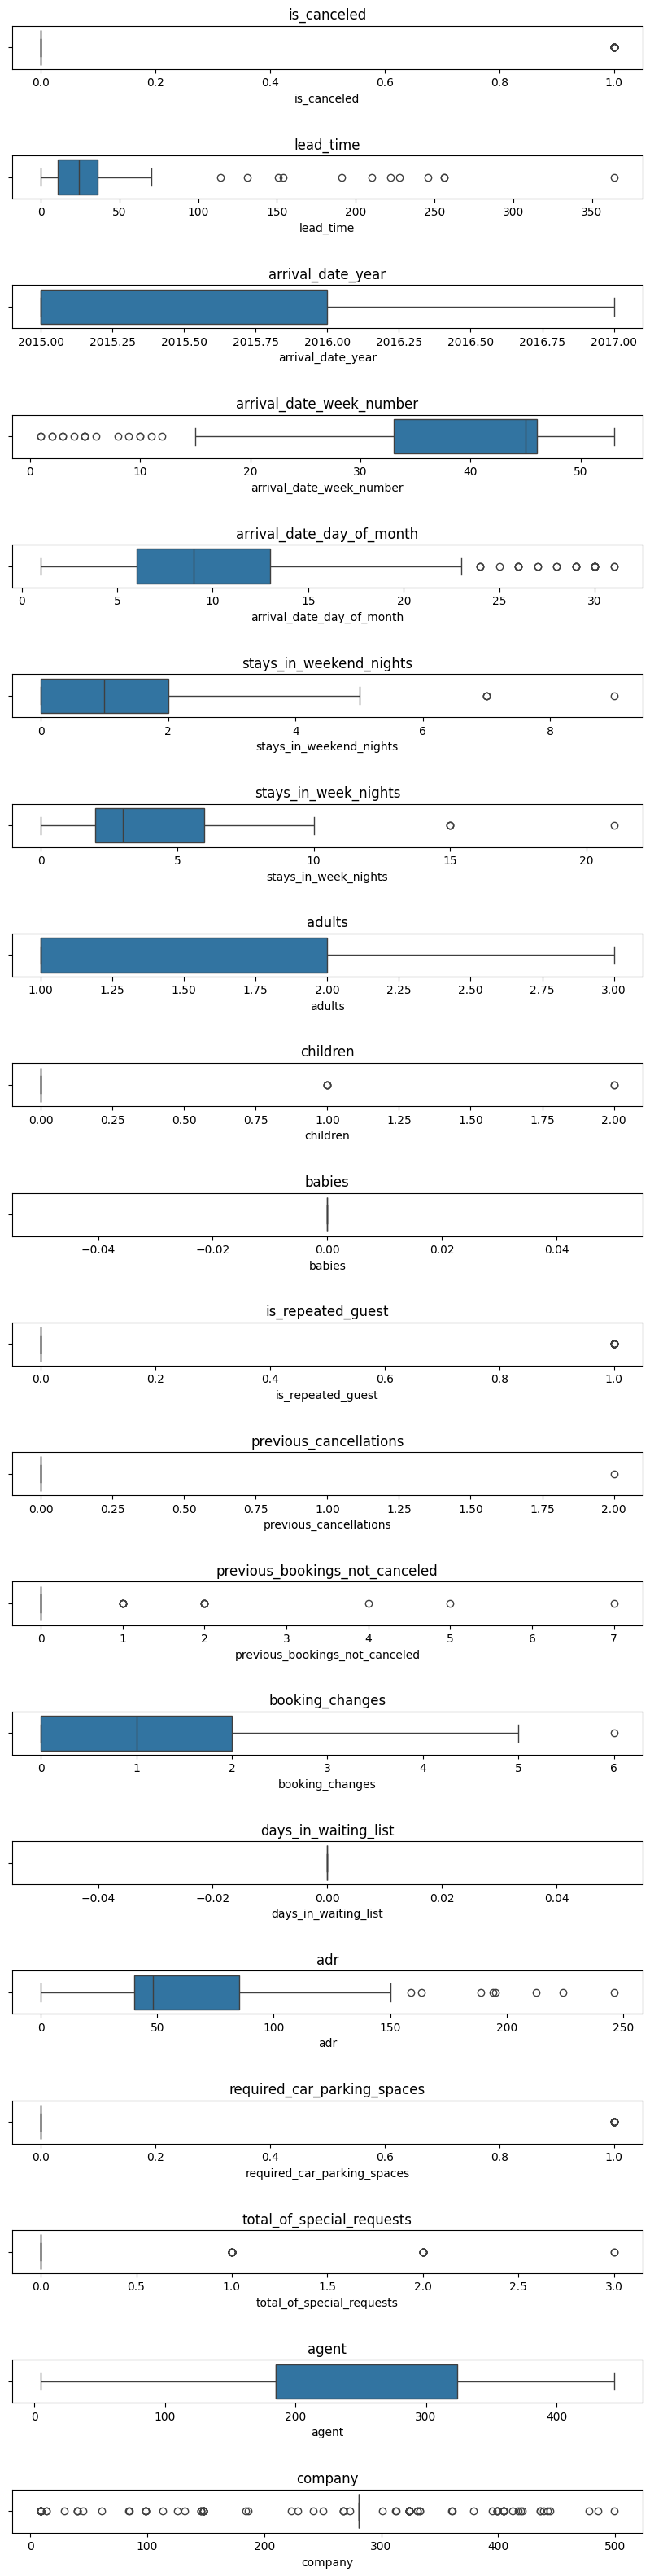

In [ ]:
cols_num = ["is_canceled",
"lead_time",
"arrival_date_year",
"arrival_date_week_number",
"arrival_date_day_of_month",
"stays_in_weekend_nights",
"stays_in_week_nights",
"adults",
"children",
"babies",
"is_repeated_guest",
"previous_cancellations",
"previous_bookings_not_canceled",
"booking_changes",
"days_in_waiting_list",
"adr",
"required_car_parking_spaces",
"total_of_special_requests",
"agent",
"company"
]

fig, ax = plt.subplots(nrows=20, ncols=1, figsize=(10,40))
fig.subplots_adjust(hspace=2)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

<ipython-input-50-6e8a6c5b2be8>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, ax=ax[i], palette='Set1')
<ipython-input-50-6e8a6c5b2be8>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
<ipython-input-50-6e8a6c5b2be8>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, ax=ax[i], palette='Set1')
<ipython-input-50-6e8a6c5b2be8>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
<ipython-input-50-6e8a6c5b2be8>:17: FutureWarning: 

Passing `palette` without assigning `hue` i

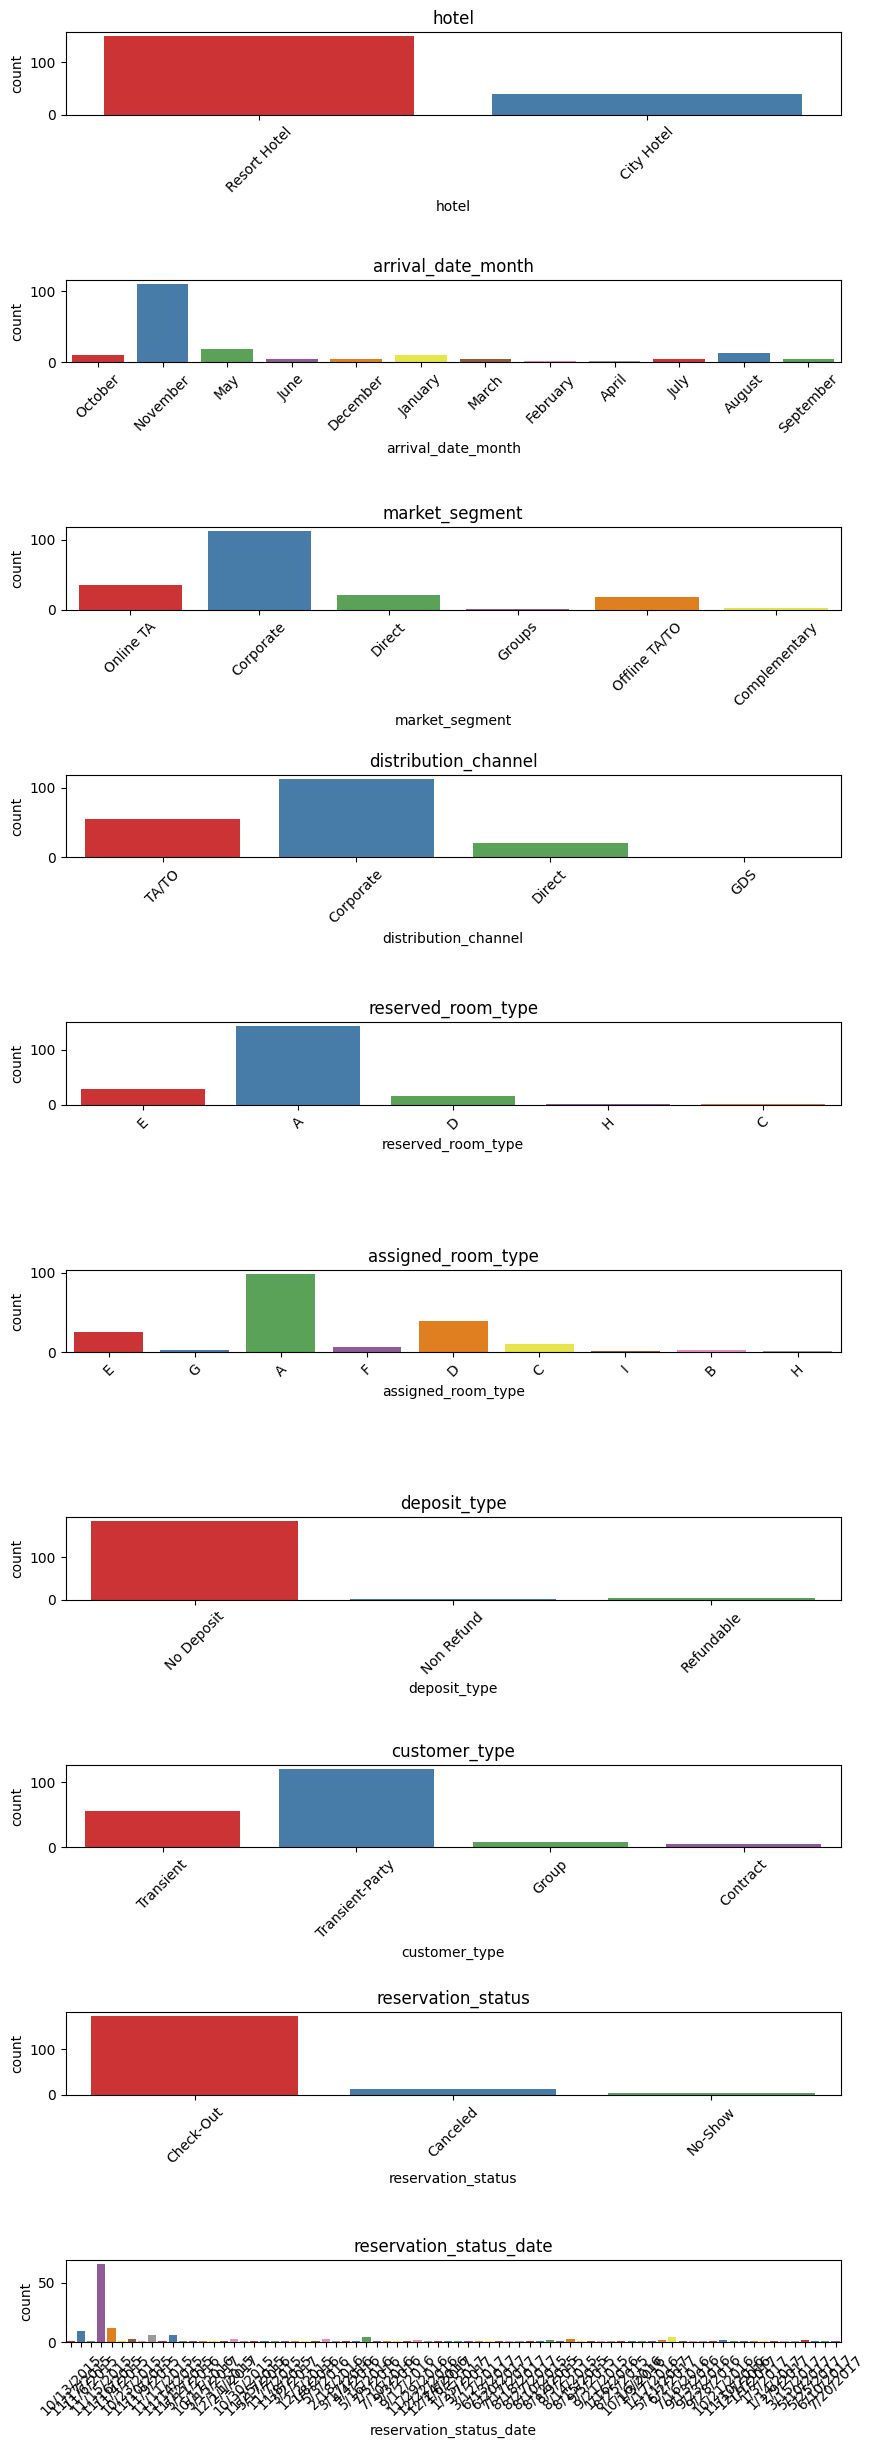

In [ ]:
cols_cat = ["hotel",
"arrival_date_month",
"market_segment",
"distribution_channel",
"reserved_room_type",
"assigned_room_type",
"deposit_type",
"customer_type",
"reservation_status",
"reservation_status_date"
]

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=2)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i], palette='Set1')
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)

Verificar si hay o no diferencias entre los tipos de habitación asignadas y las reservadas. Justificar mediante ejemplos.

<ipython-input-61-ca140a33828d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, ax=ax[i], palette='Set1')
<ipython-input-61-ca140a33828d>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
<ipython-input-61-ca140a33828d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, ax=ax[i], palette='Set1')
<ipython-input-61-ca140a33828d>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)


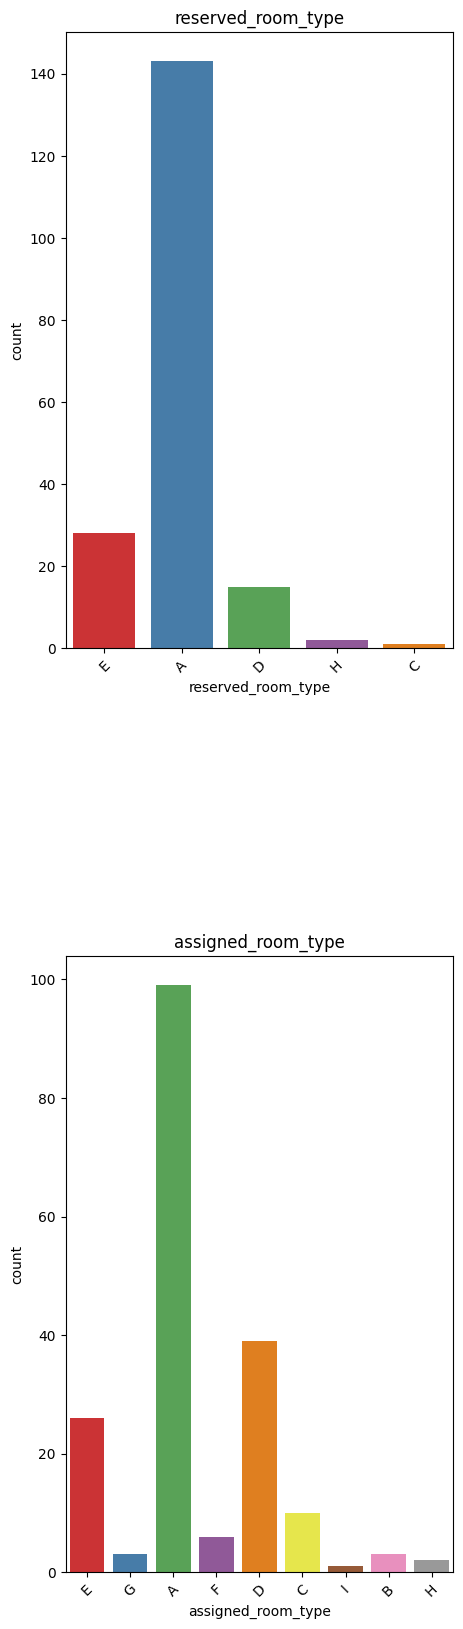

In [ ]:
cols_cat = ["reserved_room_type",	"assigned_room_type"]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5,20))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i], palette='Set1')
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)

Se puede observar que las habitaciones que mas son ocupadas cuando son reservadas son las siguientes: E,A, D. En cambio, las habitaciones asignadas mas usadas son: A,E,D

Analizar las reservas por segmento de mercado

In [ ]:
data_grouped_segment = data.groupby("market_segment")


In [ ]:
reservas_por_segmento = data_grouped_segment.size()
reservas_por_segmento

market_segment
Complementary      2
Corporate        112
Direct            21
Groups             1
Offline TA/TO     18
Online TA         35
dtype: int64

In [ ]:
segmento_predominante = reservas_por_segmento.idxmax()
segmento_predominante


'Corporate'

In [ ]:
numero_reservas_predominante = reservas_por_segmento.max()
numero_reservas_predominante

112

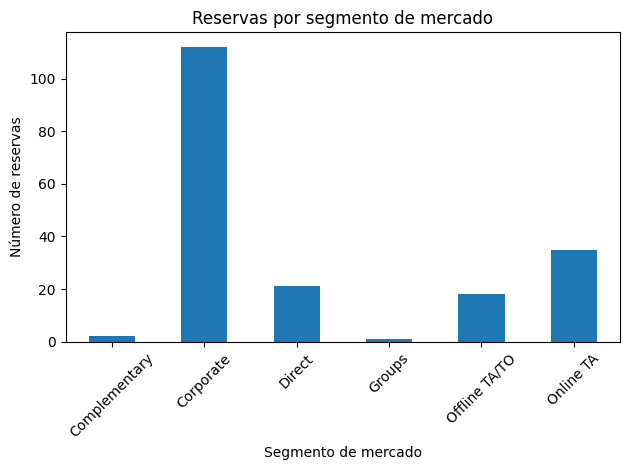

In [ ]:
reservas_por_segmento.plot(kind="bar")
plt.xlabel("Segmento de mercado")
plt.ylabel("Número de reservas")
plt.title("Reservas por segmento de mercado")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


El segmento que mas predomina es el de "Corporate"

 Analizar el precio promedio por noche de varios tipos de  habitaciones  para todos los  segmentos del mercado.

In [ ]:
data_mercado = data.groupby(["reserved_room_type", "market_segment"])


In [ ]:
precio_promedio_noche = data_mercado["adr"].mean()
precio_promedio_noche

reserved_room_type  market_segment
A                   Complementary       0.000000
                    Corporate          41.415056
                    Direct             77.814286
                    Groups            101.000000
                    Offline TA/TO      83.863636
                    Online TA          90.465556
C                   Direct            212.600000
D                   Corporate          95.000000
                    Direct             94.500000
                    Offline TA/TO     117.280000
                    Online TA         110.520000
E                   Complementary       0.000000
                    Corporate          54.111364
                    Offline TA/TO     125.265000
                    Online TA          90.333333
H                   Direct            235.000000
Name: adr, dtype: float64

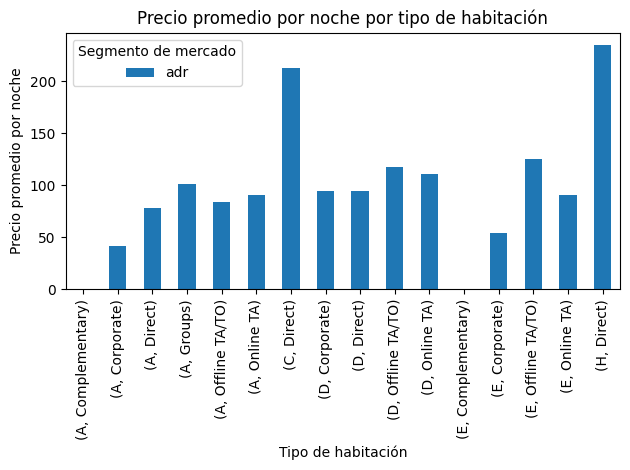

In [ ]:
precio_promedio_noche.plot(kind="bar", stacked=False)
plt.xlabel("Tipo de habitación")
plt.ylabel("Precio promedio por noche")
plt.title("Precio promedio por noche por tipo de habitación")
plt.legend(title="Segmento de mercado")
plt.tight_layout()
plt.show()


Explorar si hay algún patrón en las reservas, es decir si el número de invitados se ha incrementado o no.


In [ ]:
data["number_of_guests"] = data["adults"] + data["children"]


In [ ]:
data_grouped_fecha = data.groupby("arrival_date_month")


In [ ]:
numero_promedio_huespedes_fecha = data_grouped_fecha["number_of_guests"].mean()
numero_promedio_huespedes_fecha

arrival_date_month
April        1.000000
August       2.076923
December     1.600000
February     1.000000
January      1.600000
July         2.200000
June         2.250000
March        1.200000
May          1.222222
November     1.351351
October      1.700000
September    1.600000
Name: number_of_guests, dtype: float64

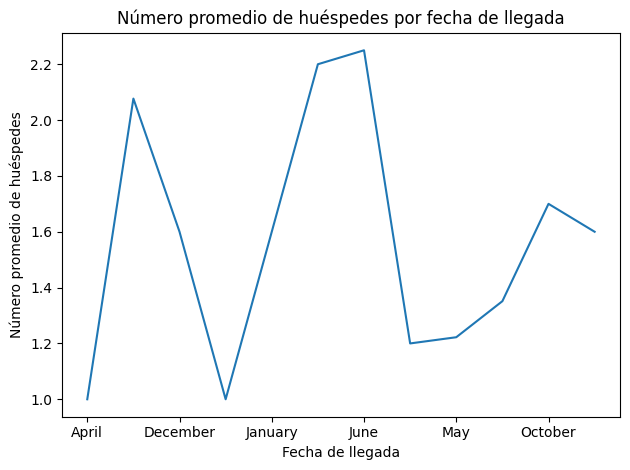

In [ ]:
numero_promedio_huespedes_fecha.plot(kind="line")
plt.xlabel("Fecha de llegada")
plt.ylabel("Número promedio de huéspedes")
plt.title("Número promedio de huéspedes por fecha de llegada")
plt.tight_layout()
plt.show()


Analizar la distribución de la llegada de visitantes.

In [ ]:

data_grouped_dia_semana = data.groupby("arrival_date_day_of_month")


In [ ]:
numero_reservas_dia_semana = data_grouped_dia_semana.size()
numero_reservas_dia_semana

arrival_date_day_of_month
1      2
2     16
3     13
4      4
5      5
6     11
7     20
8     13
9     12
10     8
11     9
12    26
13     6
14     4
15     5
16     6
19     1
20     1
21     1
22     1
23     1
24     3
25     1
26     4
27     2
28     2
29     4
30     6
31     2
dtype: int64